<a href="https://colab.research.google.com/github/gmauricio-toledo/numerical-methods/blob/master/Elemento_finito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[  0.         100.         100.         100.           0.        ]
 [ 75.          80.12695312  74.46899414  96.99554443  50.        ]
 [ 75.          38.671875    18.45703125  34.18579102  50.        ]
 [ 75.          28.125       10.546875    22.70507812  50.        ]
 [  0.           0.           0.           0.           0.        ]]


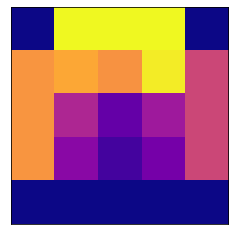

[[  0.         100.         100.         100.           0.        ]
 [ 75.          75.21972656  87.95871735  67.68736839  50.        ]
 [ 75.          57.95288086  61.63330078  71.86832428  50.        ]
 [ 75.          32.51953125  22.35717773  28.60107422  50.        ]
 [  0.           0.           0.           0.           0.        ]]


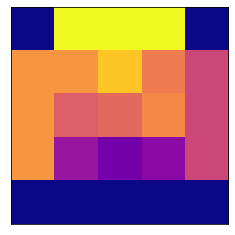

[[  0.         100.         100.         100.           0.        ]
 [ 75.          85.82897186  76.72002912  70.30309886  50.        ]
 [ 75.          66.2115097   68.34869385  51.00472569  50.        ]
 [ 75.          41.98150635  38.40236664  45.80097198  50.        ]
 [  0.           0.           0.           0.           0.        ]]


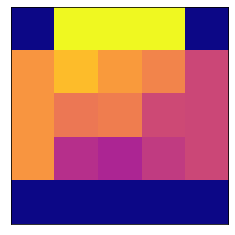

In [37]:
import numpy as np
from time import sleep
import matplotlib.pyplot as plt


# Hiperparámetros
n = 3
A = np.zeros((n+2,n+2))
n_iteraciones = 3
factor_sr = 1.5
assert factor_sr>=1 and factor_sr<=2

# condiciones iniciales
A[0,1:-1] = 100
A[1:-1,0] = 75
A[-1,1:-1] = 0
A[1:-1,-1] = 50

# Método
for k in range(n_iteraciones):
    # i,j tienen la misma interpretación que en el planteamiento del problema
    for j in range(1,n+1): # Columna (coordenada en y)
        for i in range(1,n+1): # Fila (coordenada en x)
            new_iy = n+1-j
            new_ix = i
            new_value = (A[new_iy+1,new_ix]+A[new_iy-1,new_ix]+A[new_iy,new_ix+1]+A[new_iy,new_ix-1])/4
            A[new_iy,new_ix] = factor_sr*new_value + (1-factor_sr)*A[new_iy,new_ix]
    print(A)      
    plt.figure()
    plt.imshow(A,cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    plt.show()  

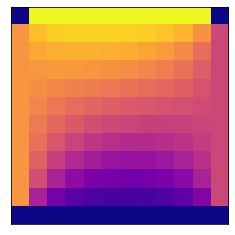

In [35]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Hiperparámetros
n = 10
A = np.zeros((n+2,n+2))
n_iteraciones = 15
factor_sr = 1.5
assert factor_sr>=1 and factor_sr<=2

# condiciones iniciales
A[0,1:-1] = 100
A[1:-1,0] = 75
A[-1,1:-1] = 0
A[1:-1,-1] = 50

figure, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
  
def animation_function(i):
    if i!=0:
        for j in range(1,n+1): # Columna (coordenada en y)
            for i in range(1,n+1): # Fila (coordenada en x)
                new_iy = n+1-j
                new_ix = i
                new_value = (A[new_iy+1,new_ix]+A[new_iy-1,new_ix]+A[new_iy,new_ix+1]+A[new_iy,new_ix-1])/4
                A[new_iy,new_ix] = factor_sr*new_value + (1-factor_sr)*A[new_iy,new_ix]
    return ax.imshow(A,cmap='plasma')
  
animation = FuncAnimation(figure,
                          func = animation_function,
                          frames = range(n_iteraciones), 
                          interval = 600)
animation.save("heat.mp4")